In [227]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage.feature import corner_peaks

### Harris Corner Detection

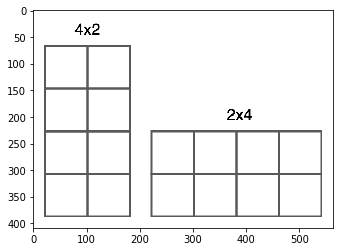

In [228]:
img = cv2.imread('../corner.png', 0) #Reading Image
plt.imshow(img, cmap='gray')
plt.savefig('corner_orig.png')

#### Sobel Operators

In [229]:
K_X = np.matrix([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) #Sobel Operators - X
K_Y = np.matrix([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]) #Sobel Operators - Y

I_X = ndimage.filters.convolve(img, K_X) #Get I_x
I_Y = ndimage.filters.convolve(img, K_Y) #Get I_y

#### Getting Matrix M

In [230]:
I_XX = cv2.blur(I_X**2, (5,5)) #Average filter to get M
I_XY = cv2.blur(I_X*I_Y, (5,5))
I_YY = cv2.blur(I_Y**2, (5,5))

#### Getting Harris Response

In [231]:
det = I_XX * I_YY - I_XY ** 2  #determinent of M
trace = I_XX + I_YY            #Trace of M
    
R = det - (0.01) * trace ** 2 #Harris Response

#### Plotting corners on image

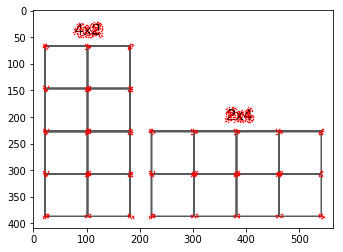

In [232]:
corn = corner_peaks(R)
plt.imshow(img, interpolation='nearest', cmap='gray')
plt.plot(corn[:, 1], corn[:, 0], '.r', markersize=1)
plt.savefig('dotted_corner.jpg')

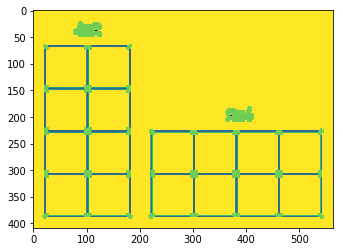

In [233]:
#In-Built Function
# img = cv2.imread('../corner.png') #Reading Image
gray = np.float32(img)
dst = cv2.cornerHarris(gray,7,5,0.04)
dst = cv2.dilate(dst,None)
img[dst>0.01*dst.max()]=[200]

plt.imshow(img)
plt.savefig('corner_cv2.png')